<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Разделение-исходных-данных-на-обучающую,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разделение-исходных-данных-на-обучающую,-валидационную-и-тестовую-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение исходных данных на обучающую, валидационную и тестовую выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Исследование-без-учета-дисбаланса" data-toc-modified-id="Исследование-без-учета-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование без учета дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Улучшение-модели" data-toc-modified-id="Улучшение-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Улучшение модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

## Подготовка данных

### Обзор данных

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Прочитаем и сохраним данные в переменную `df`

In [2]:
try:
    df= pd.read_csv('Churn.csv')
except:
    df= pd.read_csv('datasets/Churn.csv')

Посмотрим общую информацию

In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Согласно документации:  

Признаки:  
RowNumber — индекс строки в данных  
CustomerId — уникальный идентификатор клиента  
Surname — фамилия  
CreditScore — кредитный рейтинг  
Geography — страна проживания  
Gender — пол  
Age — возраст  
Tenure — сколько лет человек является клиентом банка  
Balance — баланс на счёте  
NumOfProducts — количество продуктов банка, используемых клиентом  
HasCrCard — наличие кредитной карты  
IsActiveMember — активность клиента  
EstimatedSalary — предполагаемая зарплата 

Целевой признак:  
Exited — факт ухода клиента  

Необходима подготовка данных:  

* проверка на дубликаты
* удаление столбцов `RowNumber`, `Surname` и `CustomerId`(если в нем нет дубликатов), так как они будут лишними для нашей модели
* удаление или замена пропусков в `Tenure`
* преобразование категориальных признаков `Geography` и `Gender` в численные

### Предобработка данных

Проверим данные на дубликаты

In [4]:
df.duplicated().sum()

0

Явных дубликатов нет.  
Проверим наличие дубликатов в стоблце `CustomerId`

In [5]:
df['CustomerId'].value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

Дубликатов нет, все 10000 значений разные. Значит этот столбец можно удалить вместе с `RowNumber` и `CustomerId`

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Получим количество каждого значения в `Tenure`, включая пропуски

In [7]:
df['Tenure'].value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Пропусков примерно столько же сколько и других значений, кроме "0" и "10". Но так как неизвестно откуда они появились, будет лучше удалить их, чем заменять на какое-либо значение (например "-1" или "11")

In [8]:
df = df.dropna().reset_index(drop=True)

Проверим уникальные значения столбцов `Geography` и `Gender`

In [9]:
display(df['Geography'].unique())
df['Gender'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

array(['Female', 'Male'], dtype=object)

Используем One-Hot Encoding для преобразования категориальных признаков в численные, так как эта кодировка работает со всеми моделями

In [10]:
df = pd.get_dummies(df, drop_first=True)

Проверим результат наших действий

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 666.0 KB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Все ок, можно переходить к разделению на выборки

### Разделение исходных данных на обучающую, валидационную и тестовую выборки

Перед разделением на выборки объявим две переменные: `features` с признаками и `target` с целевым признаком

In [12]:
features = df.drop(['Exited'], axis=1)
target = df['Exited']

Разделять исходные данные будем на три выборки: обучающую, валидационную и тестовую, в соотношении 3:1:1 соответственно.  
Отделим с помощью `train_test_split` обучающую выборку `_train` (60% от исходных данных)

In [13]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=23)

Оставшиеся данные разделим пополам на валидационную `_valid` и тестовую `_test` выборки (по 20% от исходных данных)

In [14]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=23)

Проверим размеры получившихся выборок

In [15]:
display(features_train.shape[0])
display(features_valid.shape[0])
display(features_test.shape[0])

5454

1819

1818

### Масштабирование признаков

Маштабировать численные признаки будем методом стандартизации данных с помощью `StandardScaler`. Создадим список `numeric` с численными признаками и преобразуем обучающую, валидационную и тестовую выборки функцией `transform`.

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
pd.options.mode.chained_assignment = None
scaler = StandardScaler().fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверим результат

In [17]:
display(features_train.head(3))
display(features_valid.head(3))
display(features_test.head(3))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4242,0.409444,-0.564774,-0.000510,-1.230358,0.811056,1,0,0.653445,0,0,1
925,0.129050,0.664123,-0.695659,-1.230358,0.811056,0,1,1.318473,0,0,1
4687,1.458323,-0.470243,0.694639,-1.230358,0.811056,1,0,-0.064161,0,0,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8855,1.115620,-0.375713,0.694639,-1.230358,0.811056,1,0,-0.390650,0,0,1
1651,0.513293,0.664123,-0.000510,-0.323148,0.811056,0,1,-0.956064,0,1,0
675,1.946416,0.002409,-0.000510,1.443026,0.811056,1,0,-1.497437,0,1,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7051,0.502908,-0.942896,-0.695659,0.784923,-0.910150,1,1,0.889952,0,0,1
8885,-1.231378,-0.281182,-0.348084,-1.230358,0.811056,1,1,0.562728,0,0,1
4321,-0.950984,-0.753835,-1.390808,1.001280,-0.910150,0,1,0.746318,0,1,0


**Вывод:**  

В ходе подготовки данных были выполнены следующие действия:

* проверили на дубликаты (их не оказалось)
* удалили столбцы не несущие ценности для обучения модели
* удалили пропуски
* преобразовали категориальные признаки в численные
* разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1
* маштабировали численные признаки

## Исследование задачи

### Исследование баланса классов

Перед обучением моделей проверим баланс классов в обучающей и валидационной выборках

In [18]:
target_train.value_counts(normalize=True)

0    0.791346
1    0.208654
Name: Exited, dtype: float64

In [19]:
target_valid.value_counts(normalize=True)

0    0.810335
1    0.189665
Name: Exited, dtype: float64

Наблюдается сильный дисбаланс классов, примерно 4:1

### Исследование без учета дисбаланса

Сначала исследуем модели без учета дисбаланса классов.  

Подготовим список с тремя алгоритмами: дерево решений, случайный лес и логистическая регрессия. Гиперпараметры оставим по умолчанию.

In [20]:
model_list = [
    DecisionTreeClassifier(random_state=23),
    RandomForestClassifier(random_state=23),
    LogisticRegression(solver='liblinear')
]

Напишем функцию, которая в цикле будет обучать модели из списка `model_list` и расчитывать матрицу ошибок и значения метрик `accuracy`, `precision`, `recall`, `f1` и `auc-roc`

In [21]:
def model_score(X_train, y_train, X_valid, y_valid):
    
    for model in model_list:
        model.fit(X_train, y_train)
        predicted_valid = pd.Series(model.predict(X_valid))
        probabilities_valid = model.predict_proba(X_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
                
        print(model)
        print(f'матрица ошибок \n {confusion_matrix(y_valid, predicted_valid)}')
        print(f'precision = {precision_score(y_valid, predicted_valid)}')
        print(f'recall = {recall_score(y_valid, predicted_valid)}')
        print(f'f1 = {f1_score(y_valid, predicted_valid)}')
        print(f'auc-roc = {roc_auc_score(y_valid, probabilities_one_valid)}')
        print('')    

Обучим модели на наших данных и посмотрим результаты

In [22]:
model_score(features_train, target_train, features_valid, target_valid)

DecisionTreeClassifier(random_state=23)
матрица ошибок 
 [[1295  179]
 [ 160  185]]
precision = 0.5082417582417582
recall = 0.5362318840579711
f1 = 0.5218617771509168
auc-roc = 0.7073968104143316

RandomForestClassifier(random_state=23)
матрица ошибок 
 [[1412   62]
 [ 183  162]]
precision = 0.7232142857142857
recall = 0.46956521739130436
f1 = 0.5694200351493849
auc-roc = 0.859560891196193

LogisticRegression(solver='liblinear')
матрица ошибок 
 [[1398   76]
 [ 271   74]]
precision = 0.49333333333333335
recall = 0.2144927536231884
f1 = 0.298989898989899
auc-roc = 0.7664995182191807



Наибольшее значение F1-меры (f1 = 0,569) показала модель случайного леса, но у данной модели низкое значение полноты (recall = 0,469). А так как нужно предсказать уход клиентов, то необходимо чтобы `recall` была максимально высокой.  

Модель дерева решений показала наибольшее значение плотности (recall = 0,536), но F1-мера (f1 = 0,522) ниже, чем у случайного леса.  

У логистической регрессии самое низкое значение F1-меры (f1 = 0,299).

**Вывод:**  

У всех трех алгоритмов невысокое значение метрики F1. Можно попробовать улучшить модели подобрав гиперпараметры, но лучше сначала разобраться с дисбалансом классов

## Борьба с дисбалансом

### Взвешивание классов

Устраним дисбаланс взвешиванием классов. Добавим во все алгоритмы гиперпараметр `class_weight='balanced'`

In [23]:
model_list = [
    DecisionTreeClassifier(random_state=23, class_weight='balanced'),
    RandomForestClassifier(random_state=23, class_weight='balanced'),
    LogisticRegression(solver='liblinear', class_weight='balanced')
]

Обучим модели и проверим значения метрик

In [24]:
model_score(features_train, target_train, features_valid, target_valid)

DecisionTreeClassifier(class_weight='balanced', random_state=23)
матрица ошибок 
 [[1291  183]
 [ 175  170]]
precision = 0.48158640226628896
recall = 0.4927536231884058
f1 = 0.4871060171919771
auc-roc = 0.6843008278764281

RandomForestClassifier(class_weight='balanced', random_state=23)
матрица ошибок 
 [[1414   60]
 [ 188  157]]
precision = 0.7235023041474654
recall = 0.45507246376811594
f1 = 0.5587188612099644
auc-roc = 0.8594517530922463

LogisticRegression(class_weight='balanced', solver='liblinear')
матрица ошибок 
 [[1074  400]
 [ 107  238]]
precision = 0.3730407523510972
recall = 0.6898550724637681
f1 = 0.48423194303153616
auc-roc = 0.7663599001042218



Показатели логистической регрессии увеличились, но все еще низкие. У дерева решений и случайного леса, наоборот, значение F1-меры уменьшилось.  
Попробуем другой способ устанить дисбаланс.

### Увеличение выборки

Устраним дисбаланс техникой увеличения выборки `upsampling`. Напишем функцию принимающую на вход признаки (features), целевой признак (target), количество повторений (repeat) и увеличиваемые объекты (upsampled_сlass), а возращающую увеличеные выборки

In [25]:
def upsample(features, target, repeat, upsampled_сlass):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros] * repeat + [features_ones])
        target_upsampled = pd.concat([target_zeros] * repeat + [target_ones])
        features_upsampled, target_upsampled = shuffle(
            features_upsampled, target_upsampled, random_state=23
        )
    
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
            features_upsampled, target_upsampled, random_state=23
        )
        
    else:
        features_upsampled = 0
        target_upsampled = 0
    
    return features_upsampled, target_upsampled

Увеличим количество положительных объектов ("1") в обучающей выборке в четыре раза

In [26]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4, 1)
target_upsampled.value_counts(normalize=True)

1    0.513306
0    0.486694
Name: Exited, dtype: float64

Дисбаланса нет. Обучим модели, гиперпараметры оставим по умолчанию

In [27]:
model_list = [
    DecisionTreeClassifier(random_state=23),
    RandomForestClassifier(random_state=23),
    LogisticRegression(solver='liblinear')
]

In [28]:
model_score(features_upsampled, target_upsampled, features_valid, target_valid)

DecisionTreeClassifier(random_state=23)
матрица ошибок 
 [[1296  178]
 [ 169  176]]
precision = 0.4971751412429379
recall = 0.5101449275362319
f1 = 0.503576537911302
auc-roc = 0.6946925451792421

RandomForestClassifier(random_state=23)
матрица ошибок 
 [[1363  111]
 [ 155  190]]
precision = 0.6312292358803987
recall = 0.5507246376811594
f1 = 0.5882352941176471
auc-roc = 0.8623070418657698

LogisticRegression(solver='liblinear')
матрица ошибок 
 [[1058  416]
 [ 103  242]]
precision = 0.3677811550151976
recall = 0.7014492753623188
f1 = 0.48255234297108673
auc-roc = 0.7663481013902818



Значения всех метрик изменились. Чтобы было проще понять какой алгоритм улучшать дальше, составим сводную таблицу со значениями F1

In [29]:
data = [[0.5218617771509168, 0.4871060171919771, 0.503576537911302],
         [0.5694200351493849 ,0.5587188612099644, 0.5882352941176471],
         [0.298989898989899 , 0.48423194303153616, 0.48255234297108673]]
index = ['DT', 'RF', 'LR']
columns = ['disbalance', 'class_weight','upsampling']
f1_data = pd.DataFrame(data=data, index=index, columns=columns)
f1_data.round(2)

,disbalance,class_weight,upsampling
DT,0.52,0.49,0.50
RF,0.57,0.56,0.59
LR,0.30,0.48,0.48


Заметно, что наибольшее значение F1 во всех трех случаях у алгоритма случайного леса, причем самое высокое (f1=0,59) получено при увеличении выборки. Именно эту модель и будем улучшать подбором оптимальных гиперпараметров

### Улучшение модели

С помощью цикла подберем гиперпараметры, при которых значение метрики F1 окажется наибольшим

In [30]:
best_model = None
best_result = 0
for est in range(70, 80):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=23, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = pd.Series(model.predict(features_valid))
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
print(best_model)
print("f1 наилучшей модели на валидационной выборке:", best_result)

RandomForestClassifier(max_depth=12, n_estimators=74, random_state=23)
f1 наилучшей модели на валидационной выборке: 0.6238030095759233


Лучшие результаты у модели `RandomForestClassifier(max_depth=12, n_estimators=74, random_state=23)`, f1 наилучшей модели на валидационной выборке: 0.6238030095759233

Построим ROC-кривую лучшей модели и расчитаем AUC-ROC

auc-roc = 0.8638349753210234


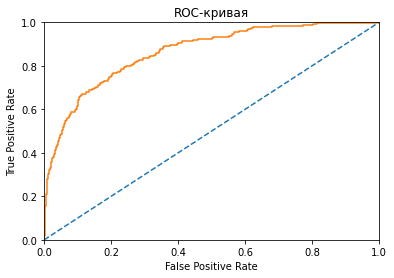

In [31]:
best_model.fit(features_upsampled, target_upsampled)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(f'auc-roc = {roc_auc_score(target_valid, probabilities_one_valid)}')
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Значение AUC-ROC тоже высокое (auc-roc = 0.864), что свидетельствует о качестве модели

### Проверка модели на адекватность

Для проверки на вменяемость будем использовать алгоритм `DummyClassifier` с гиперпараметром `strategy='most_frequent'`

In [32]:
model = DummyClassifier(strategy='most_frequent', random_state=23).fit(features_upsampled, target_upsampled)
predicted_valid = pd.Series(model.predict(features_valid))
result = f1_score(target_valid, predicted_valid)
print("F1 модели на валидационной выборке:", result)

F1 модели на валидационной выборке: 0.3188539741219963


**Вывод:**

Так как `f1` `DummyClassifier` гораздо меньше, чем у проверяемой модели, можно утверждать, что модель `RandomForestClassifier(max_depth=12, n_estimators=74, random_state=23)` вменяемая.

## Тестирование модели

Проверим модель на тестовой выборке

In [33]:
model_list = [best_model]

In [34]:
model_score(features_upsampled, target_upsampled, features_test, target_test)

RandomForestClassifier(max_depth=12, n_estimators=74, random_state=23)
матрица ошибок 
 [[1282  165]
 [ 139  232]]
precision = 0.5843828715365239
recall = 0.6253369272237197
f1 = 0.6041666666666667
auc-roc = 0.8567405003753467



**Вывод:**  

На тестовой выборке значение F1-меры больше 0,59. Можно утверждать, что модель хорошо прогнозирует уход клиентов из банка.